In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import *

## Finding Distribution of Data

In [2]:
# note: dataset excludes African nations and much of Oceania
df = pd.read_csv("suicide_rates.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [82]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
denomination              0
dtype: int64

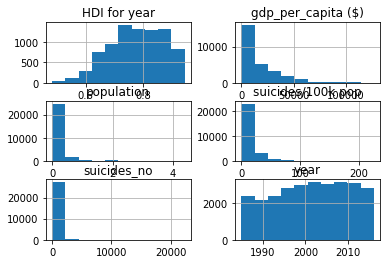

In [169]:
# plotting a histogram to find the overall distribution of the data
df.hist()
plt.savefig('histogram.png')

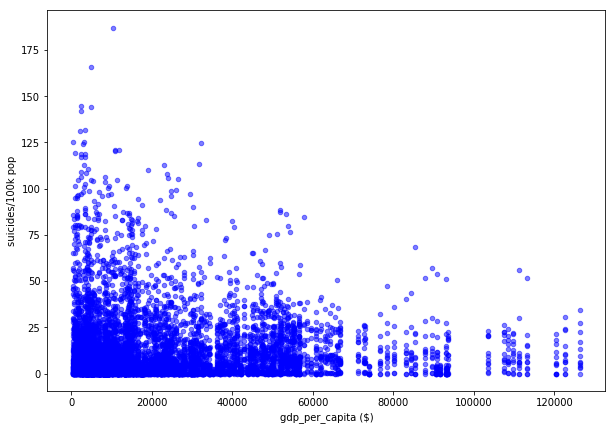

In [155]:
# plotting suicide rates as a function of GDP per capita
df[df['HDI for year'].notnull()].plot(kind='scatter', x='gdp_per_capita ($)',y='suicides/100k pop', color='blue',alpha=0.5, figsize=(10,7))
plt.savefig("suicide_rates_vs_gdp.png")

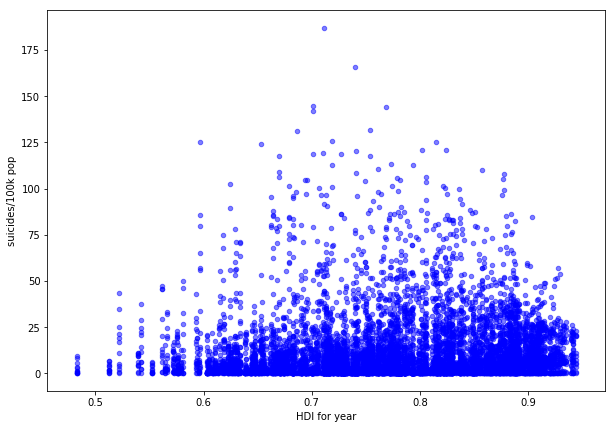

In [154]:
# plotting suicide rates as a function of human development index (HDI)
df[df['HDI for year'].notnull()].plot(kind='scatter', x='HDI for year',y='suicides/100k pop', color='blue',alpha=0.5, figsize=(10,7))
plt.savefig("suicide_rates_vs_hdi.png")

## Comparing Suicide Rates for Men vs. Women

In [167]:
m_suicide_total = df.loc[df['sex'] == 'male', 'suicides_no'].sum()
f_suicide_total = df.loc[df['sex'] == 'female', 'suicides_no'].sum()
m_pop_total = df.loc[df['sex'] == 'male', 'population'].sum()
f_pop_total = df.loc[df['sex'] == 'female', 'population'].sum()
m_suicide_100k_avg = (100000/m_pop_total)*m_suicide_total
f_suicide_100k_avg = (100000/f_pop_total)*f_suicide_total
print(m_suicide_100k_avg)
print(f_suicide_100k_avg)

20.71472710562423
5.935838878761486


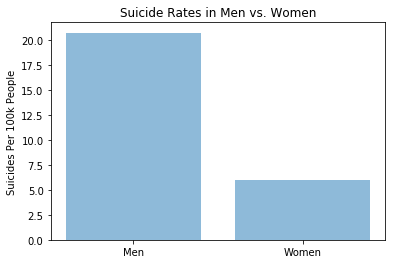

In [168]:
objs = ('Men', 'Women')
y = np.arange(len(objects))
pts = [m_suicide_100k_avg, f_suicide_100k_avg]

plt.bar(y, pts, align='center', alpha=0.5)
plt.xticks(y, objs)
plt.ylabel('Suicides Per 100k People')
plt.title('Suicide Rates in Men vs. Women')

plt.savefig("men_vs_women_suicide_rates.png")
plt.show()

## Comparing Catholic and Protestant Countries

In [3]:
# list of countries that are majority (>50%) Protestant
# based on data from https://en.wikipedia.org/wiki/Protestantism_by_country#Countries
protestant = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Denmark', 'Iceland', 'Jamaica', 'Norway',
              'Saint Kitts and Nevis', 'Saint Vincent and Grenadines', 'South Africa', 'Sweden']

In [4]:
# list of countries that are majority (>50%) Catholic
# based on data from https://en.wikipedia.org/wiki/Catholic_Church_by_country#By_country
catholic = ['Argentina', 'Austria', 'Belgium', 'Bolivia', 'Brazil', 'Cabo Verde', 'Chile', 'Colombia',
            'Costa Rica', 'Croatia', 'Cuba', 'Dominica', 'Ecuador', 'France', 'Hungary', 'Ireland',
            'Italy', 'Kiribati', 'Lithuania', 'Luxembourg', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay',
            'Peru', 'Philippines', 'Poland', 'Portugal', 'Saint Lucia', 'San Marino', 'Seychelles',
            'Slovenia', 'Spain']

In [5]:
df['denomination'] = ''

In [6]:
for i in df.index:
    for x in protestant:
        if df.at[i, 'country'] == x:
            df.at[i, 'denomination'] = 'Protestant'
    for y in catholic:
        if df.at[i, 'country'] == y:
            df.at[i, 'denomination'] = 'Catholic'
    
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,denomination
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,


In [7]:
recent = df[(df['year'] >= 2000)]
recent.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,denomination
132,Albania,2000,male,25-34 years,17,232000,7.33,Albania2000,0.656,"3,632,043,908",1299,Generation X,
133,Albania,2000,male,55-74 years,10,177400,5.64,Albania2000,0.656,"3,632,043,908",1299,Silent,
134,Albania,2000,female,75+ years,2,37800,5.29,Albania2000,0.656,"3,632,043,908",1299,G.I. Generation,
135,Albania,2000,male,75+ years,1,24900,4.02,Albania2000,0.656,"3,632,043,908",1299,G.I. Generation,
136,Albania,2000,female,15-24 years,6,263900,2.27,Albania2000,0.656,"3,632,043,908",1299,Generation X,


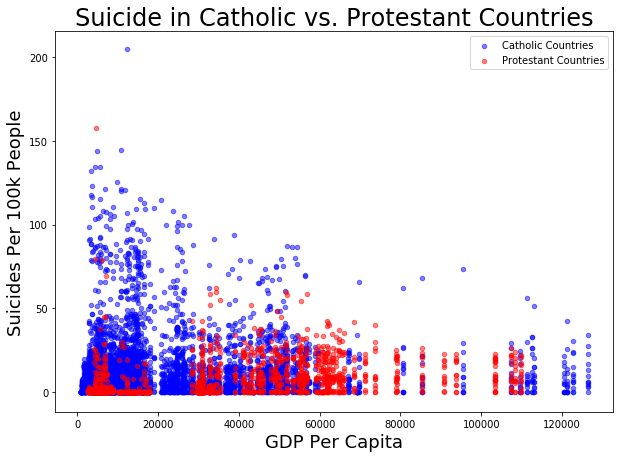

In [165]:
ax1=recent[recent['denomination']=='Catholic'].plot(kind='scatter', x='gdp_per_capita ($)',y='suicides/100k pop', color='blue',alpha=0.5, figsize=(10,7))
recent[recent['denomination']=='Protestant'].plot(kind='scatter', x='gdp_per_capita ($)',y='suicides/100k pop', color='red',alpha=0.5, figsize=(10,7),ax=ax1)
plt.legend(labels=['Catholic Countries','Protestant Countries'])
plt.title('Suicide in Catholic vs. Protestant Countries', size=24)
plt.xlabel('GDP Per Capita', size=18)
plt.ylabel('Suicides Per 100k People', size=18)
plt.savefig('scatter_religion_gdp.png')

In [8]:
cath_data = recent.loc[recent['denomination'] == 'Catholic']
cath_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,denomination
768,Argentina,2000,male,75+ years,232,525161,44.18,Argentina2000,0.762,"284,203,750,000",8462,G.I. Generation,Catholic
769,Argentina,2000,male,55-74 years,602,2333377,25.80,Argentina2000,0.762,"284,203,750,000",8462,Silent,Catholic
770,Argentina,2000,male,35-54 years,578,4096814,14.11,Argentina2000,0.762,"284,203,750,000",8462,Boomers,Catholic
771,Argentina,2000,male,15-24 years,463,3306109,14.00,Argentina2000,0.762,"284,203,750,000",8462,Generation X,Catholic
772,Argentina,2000,male,25-34 years,331,2602314,12.72,Argentina2000,0.762,"284,203,750,000",8462,Generation X,Catholic


In [85]:
cath_data_numeric = cath_data[['country', 'year', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']].copy()
cath_data_numeric.head()

,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($)
768,Argentina,2000,232,525161,44.18,Argentina2000,0.762,"284,203,750,000",8462
769,Argentina,2000,602,2333377,25.80,Argentina2000,0.762,"284,203,750,000",8462
770,Argentina,2000,578,4096814,14.11,Argentina2000,0.762,"284,203,750,000",8462
771,Argentina,2000,463,3306109,14.00,Argentina2000,0.762,"284,203,750,000",8462
772,Argentina,2000,331,2602314,12.72,Argentina2000,0.762,"284,203,750,000",8462


In [86]:
cath_data_numeric.isnull().sum()

country                  0
year                     0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year          2788
 gdp_for_year ($)        0
gdp_per_capita ($)       0
dtype: int64

In [87]:
for c in catholic:
    tmp = cath_data_numeric.loc[cath_data_numeric['country'] == c]
    hdi_avg = tmp['HDI for year'].mean()
    cath_data_numeric.loc[(cath_data_numeric['country'] == c) & (cath_data_numeric['HDI for year'].isnull()), 'HDI for year'] = hdi_avg
    
cath_data_numeric.isnull().sum()

country                0
year                   0
suicides_no            0
population             0
suicides/100k pop      0
country-year           0
HDI for year          60
 gdp_for_year ($)      0
gdp_per_capita ($)     0
dtype: int64

In [88]:
print(cath_data_numeric.loc[cath_data_numeric['HDI for year'].isnull()])

          country  year  suicides_no  population  suicides/100k pop  \
4904   Cabo Verde  2011            2        4954              40.37   
4905   Cabo Verde  2011           18       47077              38.24   
4906   Cabo Verde  2011            8       42962              18.62   
4907   Cabo Verde  2011            2       19887              10.06   
4908   Cabo Verde  2011            5       57386               8.71   
4909   Cabo Verde  2011            1       14827               6.74   
4910   Cabo Verde  2011            3       57301               5.24   
4911   Cabo Verde  2011            2       49078               4.08   
4912   Cabo Verde  2011            1       56039               1.78   
4913   Cabo Verde  2011            0       38528               0.00   
4914   Cabo Verde  2011            0       56558               0.00   
4915   Cabo Verde  2011            0        7582               0.00   
14156    Kiribati  2000            0        7870               0.00   
14157 

In [92]:
cath_data_numeric = cath_data_numeric.dropna()
cath_data_numeric.isnull().sum()

country               0
year                  0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
dtype: int64

In [93]:
for i in cath_data_numeric.index:
    str_mask = cath_data_numeric.at[i, 'country-year']
    str_mask = str_mask.replace(' ', '')
    cath_data_numeric.at[i, 'country-year'] = str_mask

cath_data_numeric.head()

,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($)
768,Argentina,2000,232,525161,44.18,Argentina2000,0.762,"284,203,750,000",8462
769,Argentina,2000,602,2333377,25.80,Argentina2000,0.762,"284,203,750,000",8462
770,Argentina,2000,578,4096814,14.11,Argentina2000,0.762,"284,203,750,000",8462
771,Argentina,2000,463,3306109,14.00,Argentina2000,0.762,"284,203,750,000",8462
772,Argentina,2000,331,2602314,12.72,Argentina2000,0.762,"284,203,750,000",8462


In [94]:
cath_country_yrs = cath_data_numeric['country-year'].unique()
print(cath_country_yrs)
print(len(cath_country_yrs))

['Argentina2000' 'Argentina2001' 'Argentina2002' 'Argentina2003'
 'Argentina2004' 'Argentina2005' 'Argentina2006' 'Argentina2007'
 'Argentina2008' 'Argentina2009' 'Argentina2010' 'Argentina2011'
 'Argentina2012' 'Argentina2013' 'Argentina2014' 'Argentina2015'
 'Austria2000' 'Austria2001' 'Austria2002' 'Austria2003' 'Austria2004'
 'Austria2005' 'Austria2006' 'Austria2007' 'Austria2008' 'Austria2009'
 'Austria2010' 'Austria2011' 'Austria2012' 'Austria2013' 'Austria2014'
 'Austria2015' 'Austria2016' 'Belgium2000' 'Belgium2001' 'Belgium2002'
 'Belgium2003' 'Belgium2004' 'Belgium2005' 'Belgium2006' 'Belgium2007'
 'Belgium2008' 'Belgium2009' 'Belgium2010' 'Belgium2011' 'Belgium2012'
 'Belgium2013' 'Belgium2014' 'Belgium2015' 'Brazil2000' 'Brazil2001'
 'Brazil2002' 'Brazil2003' 'Brazil2004' 'Brazil2005' 'Brazil2006'
 'Brazil2007' 'Brazil2008' 'Brazil2009' 'Brazil2010' 'Brazil2011'
 'Brazil2012' 'Brazil2013' 'Brazil2014' 'Brazil2015' 'Chile2000'
 'Chile2001' 'Chile2002' 'Chile2003' 'Chile2004'

In [117]:
cath_agg = pd.DataFrame()
cath_agg['country-year'] = cath_country_yrs
cath_agg['year'] = None
cath_agg['suicides_no'] = None
cath_agg['population'] = None
cath_agg['suicides_100k pop'] = None
cath_agg['hdi'] = None
cath_agg['gdp'] = None
cath_agg['gdp_per_capita'] = None
for i in range(0, len(cath_country_yrs)):
    mask = (cath_data_numeric['country-year'] == cath_agg.at[i, 'country-year'])
    tmp = cath_data_numeric[mask]
    cath_agg.at[i, 'year'] = tmp['year'].iloc[0]
    cath_agg.at[i, 'suicides_no'] = tmp['suicides_no'].sum()
    cath_agg.at[i, 'population'] = tmp['population'].sum()
    if (tmp['population'].sum() < 100000):
        cath_agg.at[i, 'suicides_100k pop'] = (tmp['population'].sum()/100000)*tmp['suicides_no'].sum()
    else:
        cath_agg.at[i, 'suicides_100k pop'] = (100000/tmp['population'].sum())*tmp['suicides_no'].sum()
    cath_agg.at[i, 'hdi'] = tmp['HDI for year'].iloc[0]
    cath_agg.at[i, 'gdp'] = tmp[' gdp_for_year ($) '].iloc[0]
    cath_agg.at[i, 'gdp_per_capita'] = tmp['gdp_per_capita ($)'].iloc[0]
    
print(cath_agg)

      country-year  year suicides_no population suicides_100k pop       hdi  \
0    Argentina2000  2000        2774   33585533           8.25951     0.762   
1    Argentina2001  2001        3132   34010946            9.2088  0.809429   
2    Argentina2002  2002        3162   34407507           9.18985  0.809429   
3    Argentina2003  2003        3289   34785907           9.45498  0.809429   
4    Argentina2004  2004        3121   35162945           8.87582  0.809429   
5    Argentina2005  2005        3058   35550617           8.60182     0.775   
6    Argentina2006  2006        3108   35918886           8.65283  0.809429   
7    Argentina2007  2007        2946   36315492           8.11224  0.809429   
8    Argentina2008  2008        3059   36733520           8.32754  0.809429   
9    Argentina2009  2009        2884   37158001           7.76145  0.809429   
10   Argentina2010  2010        2943   37578454           7.83162     0.811   
11   Argentina2011  2011        2912   38015739     

In [96]:
prot_data = recent.loc[recent['denomination'] == 'Protestant']
prot_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,denomination
420,Antigua and Barbuda,2000,male,55-74 years,1,3333,30.00,Antigua and Barbuda2000,NaN,"830,158,778",11021,Silent,Protestant
421,Antigua and Barbuda,2000,male,35-54 years,1,10033,9.97,Antigua and Barbuda2000,NaN,"830,158,778",11021,Boomers,Protestant
422,Antigua and Barbuda,2000,female,15-24 years,0,6616,0.00,Antigua and Barbuda2000,NaN,"830,158,778",11021,Generation X,Protestant
423,Antigua and Barbuda,2000,female,25-34 years,0,8595,0.00,Antigua and Barbuda2000,NaN,"830,158,778",11021,Generation X,Protestant
424,Antigua and Barbuda,2000,female,35-54 years,0,11040,0.00,Antigua and Barbuda2000,NaN,"830,158,778",11021,Boomers,Protestant


In [97]:
prot_data_numeric = prot_data[['country', 'year', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']].copy()
prot_data_numeric.head()

,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($)
420,Antigua and Barbuda,2000,1,3333,30.00,Antigua and Barbuda2000,NaN,"830,158,778",11021
421,Antigua and Barbuda,2000,1,10033,9.97,Antigua and Barbuda2000,NaN,"830,158,778",11021
422,Antigua and Barbuda,2000,0,6616,0.00,Antigua and Barbuda2000,NaN,"830,158,778",11021
423,Antigua and Barbuda,2000,0,8595,0.00,Antigua and Barbuda2000,NaN,"830,158,778",11021
424,Antigua and Barbuda,2000,0,11040,0.00,Antigua and Barbuda2000,NaN,"830,158,778",11021


In [98]:
prot_data_numeric.isnull().sum()

country                  0
year                     0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year          1064
 gdp_for_year ($)        0
gdp_per_capita ($)       0
dtype: int64

In [99]:
for p in protestant:
    tmp = prot_data_numeric.loc[prot_data_numeric['country'] == p]
    hdi_avg = tmp['HDI for year'].mean()
    prot_data_numeric.loc[(prot_data_numeric['country'] == p) & (prot_data_numeric['HDI for year'].isnull()), 'HDI for year'] = hdi_avg
    
prot_data_numeric.isnull().sum()

country               0
year                  0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
dtype: int64

In [100]:
for i in prot_data_numeric.index:
    str_mask = prot_data_numeric.at[i, 'country-year']
    str_mask = str_mask.replace(' ', '')
    prot_data_numeric.at[i, 'country-year'] = str_mask

prot_data_numeric.head()

,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($)
420,Antigua and Barbuda,2000,1,3333,30.00,AntiguaandBarbuda2000,0.781667,"830,158,778",11021
421,Antigua and Barbuda,2000,1,10033,9.97,AntiguaandBarbuda2000,0.781667,"830,158,778",11021
422,Antigua and Barbuda,2000,0,6616,0.00,AntiguaandBarbuda2000,0.781667,"830,158,778",11021
423,Antigua and Barbuda,2000,0,8595,0.00,AntiguaandBarbuda2000,0.781667,"830,158,778",11021
424,Antigua and Barbuda,2000,0,11040,0.00,AntiguaandBarbuda2000,0.781667,"830,158,778",11021


In [101]:
prot_country_yrs = prot_data_numeric['country-year'].unique()
print(prot_country_yrs)
print(len(prot_country_yrs))

['AntiguaandBarbuda2000' 'AntiguaandBarbuda2001' 'AntiguaandBarbuda2002'
 'AntiguaandBarbuda2003' 'AntiguaandBarbuda2004' 'AntiguaandBarbuda2005'
 'AntiguaandBarbuda2006' 'AntiguaandBarbuda2007' 'AntiguaandBarbuda2008'
 'AntiguaandBarbuda2009' 'AntiguaandBarbuda2012' 'AntiguaandBarbuda2013'
 'AntiguaandBarbuda2014' 'AntiguaandBarbuda2015' 'Bahamas2000'
 'Bahamas2001' 'Bahamas2002' 'Bahamas2003' 'Bahamas2004' 'Bahamas2005'
 'Bahamas2006' 'Bahamas2007' 'Bahamas2008' 'Bahamas2009' 'Bahamas2010'
 'Bahamas2011' 'Bahamas2012' 'Bahamas2013' 'Barbados2000' 'Barbados2001'
 'Barbados2002' 'Barbados2003' 'Barbados2004' 'Barbados2005'
 'Barbados2006' 'Barbados2007' 'Barbados2008' 'Barbados2009'
 'Barbados2010' 'Barbados2011' 'Barbados2012' 'Barbados2013' 'Denmark2000'
 'Denmark2001' 'Denmark2002' 'Denmark2003' 'Denmark2004' 'Denmark2005'
 'Denmark2006' 'Denmark2007' 'Denmark2008' 'Denmark2009' 'Denmark2010'
 'Denmark2011' 'Denmark2012' 'Denmark2013' 'Denmark2014' 'Denmark2015'
 'Iceland2000' 'Icel

In [118]:
prot_agg = pd.DataFrame()
prot_agg['country-year'] = prot_country_yrs
prot_agg['year'] = None
prot_agg['suicides_no'] = None
prot_agg['population'] = None
prot_agg['suicides_100k pop'] = None
prot_agg['hdi'] = None
prot_agg['gdp'] = None
prot_agg['gdp_per_capita'] = None
for i in range(0, len(prot_country_yrs)):
    mask = (prot_data_numeric['country-year'] == prot_agg.at[i, 'country-year'])
    tmp = prot_data_numeric[mask]
    prot_agg.at[i, 'year'] = tmp['year'].iloc[0]
    prot_agg.at[i, 'suicides_no'] = tmp['suicides_no'].sum()
    prot_agg.at[i, 'population'] = tmp['population'].sum()
    if (tmp['population'].sum() < 100000):
        prot_agg.at[i, 'suicides_100k pop'] = (tmp['population'].sum()/100000)*tmp['suicides_no'].sum()
    else:
        prot_agg.at[i, 'suicides_100k pop'] = (100000/tmp['population'].sum())*tmp['suicides_no'].sum()
    prot_agg.at[i, 'hdi'] = tmp['HDI for year'].iloc[0]
    prot_agg.at[i, 'gdp'] = tmp[' gdp_for_year ($) '].iloc[0]
    prot_agg.at[i, 'gdp_per_capita'] = tmp['gdp_per_capita ($)'].iloc[0]
    
print(prot_agg)

              country-year  year suicides_no population suicides_100k pop  \
0    AntiguaandBarbuda2000  2000           2      75326           1.50652   
1    AntiguaandBarbuda2001  2001           2      76497           1.52994   
2    AntiguaandBarbuda2002  2002           0      77588                 0   
3    AntiguaandBarbuda2003  2003           1      78658           0.78658   
4    AntiguaandBarbuda2004  2004           2      79722           1.59444   
5    AntiguaandBarbuda2005  2005           0      80809                 0   
6    AntiguaandBarbuda2006  2006           0      81973                 0   
7    AntiguaandBarbuda2007  2007           1      83131           0.83131   
8    AntiguaandBarbuda2008  2008           0      84273                 0   
9    AntiguaandBarbuda2009  2009           0      85405                 0   
10   AntiguaandBarbuda2012  2012           0      88703                 0   
11   AntiguaandBarbuda2013  2013           0      89779                 0   

In [103]:
cath_suicide_total = cath_agg['suicides_no'].sum()
prot_suicide_total = prot_agg['suicides_no'].sum()
print(cath_suicide_total)
print(prot_suicide_total)

928116
46155


In [104]:
cath_pop_total = cath_agg['population'].sum()
prot_pop_total = prot_agg['population'].sum()
print(cath_pop_total)
print(prot_pop_total)

11088237332
1059993160


In [105]:
cath_suicide_100k_avg = cath_agg['suicides_100k pop'].mean()
prot_suicide_100k_avg = prot_agg['suicides_100k pop'].mean()
print(cath_suicide_100k_avg)
print(prot_suicide_100k_avg)

12.422798346167133
6.561952846292726


In [106]:
cath_hdi_avg = cath_agg['hdi'].mean()
prot_hdi_avg = prot_agg['hdi'].mean()
print(cath_hdi_avg)
print(prot_hdi_avg)

0.793387786703923
0.8105195238095241


In [107]:
cath_gdp_num = pd.to_numeric(cath_agg['gdp'].str.replace(',', '').astype(float))
cath_gdp_avg = cath_gdp_num.mean()
prot_gdp_num = pd.to_numeric(prot_agg['gdp'].str.replace(',', '').astype(float))
prot_gdp_avg = prot_gdp_num.mean()
print(cath_gdp_avg)
print(prot_gdp_avg)

412841398336.45966
151761508386.48666


In [108]:
cath_gdp_per_capita_avg = cath_agg['gdp_per_capita'].mean()
prot_gdp_per_capita_avg = prot_agg['gdp_per_capita'].mean()
print(cath_gdp_per_capita_avg)
print(prot_gdp_per_capita_avg)

19766.51100244499
32894.54


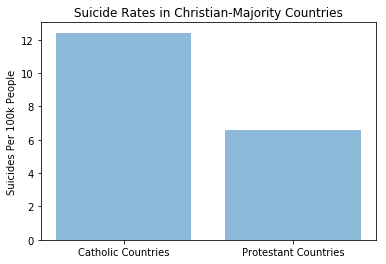

In [140]:
objects = ('Catholic Countries', 'Protestant Countries')
y_pos = np.arange(len(objects))
suicide_pts = [cath_suicide_100k_avg, prot_suicide_100k_avg]

plt.bar(y_pos, suicide_pts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Suicides Per 100k People')
plt.title('Suicide Rates in Christian-Majority Countries')

plt.savefig("cath_vs_prot_suicide_rates.png")
plt.show()

In [122]:
cath_agg_yrly = cath_agg[['year', 'suicides_no', 'population', 'suicides_100k pop', 'hdi', 'gdp', 'gdp_per_capita']].copy()
prot_agg_yrly = prot_agg[['year', 'suicides_no', 'population', 'suicides_100k pop', 'hdi', 'gdp', 'gdp_per_capita']].copy()

,year,suicides_no,population,suicides_100k pop,hdi,gdp,gdp_per_capita
0,2000,2774,33585533,8.25951,0.762,"284,203,750,000",8462
1,2001,3132,34010946,9.2088,0.809429,"268,696,750,000",7900
2,2002,3162,34407507,9.18985,0.809429,"97,724,004,252",2840
3,2003,3289,34785907,9.45498,0.809429,"127,586,973,492",3668
4,2004,3121,35162945,8.87582,0.809429,"164,657,930,453",4683


In [131]:
# I chose to exclude 2016 from the dataset since many countries don't have any data for that year,
# so the results are skewed

#yrs = cath_agg['year'].unique()
yrs = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
print(yrs)
print(len(yrs))

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
16


In [132]:
cath_agg_yrly = pd.DataFrame()
cath_agg_yrly['year'] = yrs
cath_agg_yrly['suicides_no'] = None
cath_agg_yrly['population'] = None
cath_agg_yrly['suicides_100k pop'] = None
cath_agg_yrly['hdi'] = None
cath_agg_yrly['gdp'] = None
cath_agg_yrly['gdp_per_capita'] = None
for i in range(0, len(yrs)):
    mask = (cath_agg['year'] == cath_agg_yrly.at[i, 'year'])
    tmp = cath_agg[mask]
    cath_agg_yrly.at[i, 'suicides_no'] = tmp['suicides_no'].sum()
    cath_agg_yrly.at[i, 'population'] = tmp['population'].sum()
    if (tmp['population'].sum() < 100000):
        cath_agg_yrly.at[i, 'suicides_100k pop'] = (tmp['population'].sum()/100000)*tmp['suicides_no'].sum()
    else:
        cath_agg_yrly.at[i, 'suicides_100k pop'] = (100000/tmp['population'].sum())*tmp['suicides_no'].sum()
    cath_agg_yrly.at[i, 'hdi'] = tmp['hdi'].mean()
    cath_agg_yrly.at[i, 'gdp'] = pd.to_numeric(tmp['gdp'].str.replace(',', '').astype(float)).mean()
    cath_agg_yrly.at[i, 'gdp_per_capita'] = tmp['gdp_per_capita'].mean()
    
print(cath_agg_yrly)

    year suicides_no population suicides_100k pop       hdi          gdp  \
0   2000       56542  664807772           8.50501   0.75384  2.41515e+11   
1   2001       57076  673112761           8.47941  0.793154   2.3371e+11   
2   2002       57966  681759179           8.50242  0.793154  2.41589e+11   
3   2003       58688  690528415             8.499  0.793154  2.85358e+11   
4   2004       56026  615757017           9.09872   0.79834  3.45518e+11   
5   2005       55819  622790969           8.96272  0.780708  3.77246e+11   
6   2006       56547  707378934           7.99388   0.79214  4.01386e+11   
7   2007       56613  726129253           7.79655  0.796183  4.76725e+11   
8   2008       59028  735036735           8.03062  0.793154  5.12152e+11   
9   2009       61025  743168823           8.21146  0.793154  4.68705e+11   
10  2010       60466  755937510           7.99881  0.792074  4.80392e+11   
11  2011       61830  762146316           8.11262  0.795519  5.31697e+11   
12  2012    

In [134]:
prot_agg_yrly = pd.DataFrame()
prot_agg_yrly['year'] = yrs
prot_agg_yrly['suicides_no'] = None
prot_agg_yrly['population'] = None
prot_agg_yrly['suicides_100k pop'] = None
prot_agg_yrly['hdi'] = None
prot_agg_yrly['gdp'] = None
prot_agg_yrly['gdp_per_capita'] = None
for i in range(0, len(yrs)):
    mask = (prot_agg['year'] == prot_agg_yrly.at[i, 'year'])
    tmp = prot_agg[mask]
    prot_agg_yrly.at[i, 'suicides_no'] = tmp['suicides_no'].sum()
    prot_agg_yrly.at[i, 'population'] = tmp['population'].sum()
    if (tmp['population'].sum() < 100000):
        prot_agg_yrly.at[i, 'suicides_100k pop'] = (tmp['population'].sum()/100000)*tmp['suicides_no'].sum()
    else:
        prot_agg_yrly.at[i, 'suicides_100k pop'] = (100000/tmp['population'].sum())*tmp['suicides_no'].sum()
    prot_agg_yrly.at[i, 'hdi'] = tmp['hdi'].mean()
    prot_agg_yrly.at[i, 'gdp'] = pd.to_numeric(tmp['gdp'].str.replace(',', '').astype(float)).mean()
    prot_agg_yrly.at[i, 'gdp_per_capita'] = tmp['gdp_per_capita'].mean()
    
print(prot_agg_yrly)

    year suicides_no population suicides_100k pop       hdi          gdp  \
0   2000        2748   61465209           4.47082  0.785367  7.61975e+10   
1   2001        2911   62215870           4.67887  0.804925  7.30292e+10   
2   2002        2640   62948074           4.19393  0.804925  7.85957e+10   
3   2003        2537   63664471           3.98495  0.804925  9.87413e+10   
4   2004        2775   64359695            4.3117  0.804925  1.16426e+11   
5   2005        2938   65029352           4.51796  0.797967  1.26311e+11   
6   2006        2942   65680078           4.47929  0.804925  1.36529e+11   
7   2007        2663   63802568           4.17381  0.814278  1.71753e+11   
8   2008        2766   63065500           4.38592  0.814278  1.83537e+11   
9   2009        2893   67722246           4.27186  0.804925  1.47604e+11   
10  2010        2712   68377113           3.96624  0.808444   1.8406e+11   
11  2011        2743   69176968           3.96519  0.812778  2.07489e+11   
12  2012    

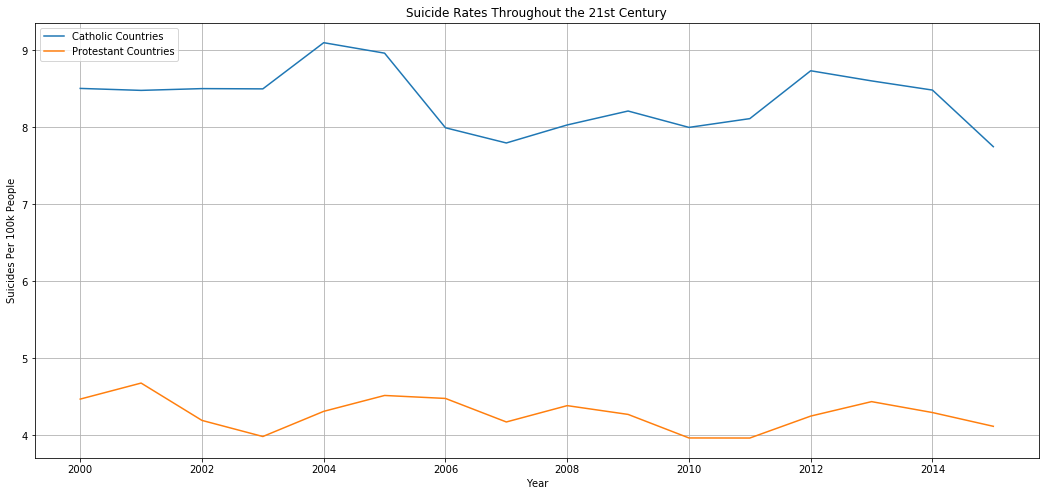

In [141]:
fig = plt.figure(figsize=(18,8))
t = arange(2000, 2016, 1)
s = cath_agg_yrly['suicides_100k pop']
s2 = prot_agg_yrly['suicides_100k pop']
plt.plot(t, s)
plt.plot(t, s2)

plt.legend(['Catholic Countries', 'Protestant Countries'], loc='upper left')
xlabel('Year')
ylabel('Suicides Per 100k People')
title('Suicide Rates Throughout the 21st Century')
grid(True)
plt.savefig("yearly_suicide_rates.png")
plt.show()